# K-Nearest Neighbors Classification
> Documentation: https://scikit-learn.org/stable/modules/generated/sklearn.neighbors.KNeighborsClassifier.html

## Setup

### Environment

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn import datasets

### Load the dataset iris

In [2]:
iris = datasets.load_iris()

In [3]:
df = pd.DataFrame({'Sepal length': iris.data[:,0],
                   'Sepal width': iris.data[:,1],
                   'Petal length':iris.data[:,2],
                   'Petal width':iris.data[:,3],
                   'Species':iris.target})
df.head()

Sepal length  Sepal width  Petal length  Petal width  Species
0           5.1          3.5           1.4          0.2        0
1           4.9          3.0           1.4          0.2        0
2           4.7          3.2           1.3          0.2        0
3           4.6          3.1           1.5          0.2        0
4           5.0          3.6           1.4          0.2        0

In [4]:
df = df[df['Species'] != 0]

In [5]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 100 entries, 50 to 149
Data columns (total 5 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   Sepal length  100 non-null    float64
 1   Sepal width   100 non-null    float64
 2   Petal length  100 non-null    float64
 3   Petal width   100 non-null    float64
 4   Species       100 non-null    int64  
dtypes: float64(4), int64(1)
memory usage: 4.7 KB


### A simple visualization

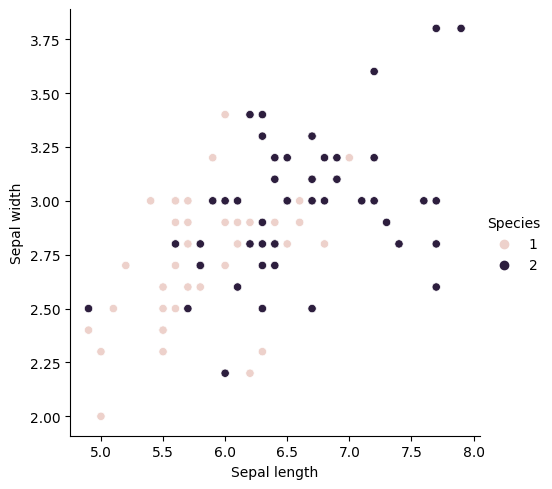

In [6]:
sns.relplot(data = df, x = 'Sepal length', y = 'Sepal width', hue = 'Species')

### Train-Test Split

In [7]:
from sklearn.model_selection import train_test_split

X = df[df.columns[:2]]
y = df[df.columns[-1]]
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size = 0.50)

In [8]:
X_train[:5]

Sepal length  Sepal width
99            5.7          2.8
51            6.4          3.2
57            4.9          2.4
134           6.1          2.6
59            5.2          2.7

### Scaling

In [9]:
from sklearn.preprocessing import StandardScaler

scaler = StandardScaler()
scaler.fit(X_train)
X_train = scaler.transform(X_train)
X_test = scaler.transform(X_test)

In [10]:
X_train[:5]

array([[-0.83327391, -0.12378458],
       [ 0.1454035 ,  1.33250465],
       [-1.95176237, -1.58007382],
       [-0.27402967, -0.8519292 ],
       [-1.5323292 , -0.48785689]])

## Train your model

In [11]:
k = 1

In [12]:
from sklearn.neighbors import KNeighborsClassifier

classifier = KNeighborsClassifier(n_neighbors = k)
classifier.fit(X_train, y_train)

KNeighborsClassifier(n_neighbors=1)

In [13]:
y_pred = classifier.predict(X_test)

In [14]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

result = confusion_matrix(y_test, y_pred)
print("Confusion Matrix:")
print(result)
result1 = classification_report(y_test, y_pred)
print("Classification Report:",)
print (result1)
result2 = accuracy_score(y_test,y_pred)
print("Accuracy:",result2)

Confusion Matrix:
[[13  9]
 [14 14]]
Classification Report:
              precision    recall  f1-score   support

           1       0.48      0.59      0.53        22
           2       0.61      0.50      0.55        28

    accuracy                           0.54        50
   macro avg       0.55      0.55      0.54        50
weighted avg       0.55      0.54      0.54        50

Accuracy: 0.54


## Best k

In [15]:
def knn_tuning(k):
  classifier = KNeighborsClassifier(n_neighbors = k)
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [16]:
knn_tuning(1)

0.54

In [17]:
knn_tuning(5)

0.6

In [18]:
knn_results = pd.DataFrame({'K':np.arange(1, len(X_train), 5)})

In [19]:
knn_results['K']

0     1
1     6
2    11
3    16
4    21
5    26
6    31
7    36
8    41
9    46
Name: K, dtype: int64

In [20]:
knn_results['Accuracy'] = knn_results['K'].apply(knn_tuning)
knn_results['Accuracy']

0    0.54
1    0.54
2    0.66
3    0.66
4    0.64
5    0.58
6    0.62
7    0.58
8    0.60
9    0.44
Name: Accuracy, dtype: float64

In [21]:
knn_results

K  Accuracy
0   1      0.54
1   6      0.54
2  11      0.66
3  16      0.66
4  21      0.64
5  26      0.58
6  31      0.62
7  36      0.58
8  41      0.60
9  46      0.44

## Optimize weights

In [22]:
def knn_tuning_uniform(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'uniform')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [23]:
def knn_tuning_distance(k):
  classifier = KNeighborsClassifier(n_neighbors = k, weights= 'distance')
  classifier.fit(X_train, y_train)
  y_pred = classifier.predict(X_test)
  accuracy = accuracy_score(y_test,y_pred)
  return accuracy

In [24]:
knn_results['Uniform'] = knn_results['K'].apply(knn_tuning_uniform)
knn_results['Distance'] = knn_results['K'].apply(knn_tuning_distance)
knn_results

K  Accuracy  Uniform  Distance
0   1      0.54     0.54      0.54
1   6      0.54     0.54      0.60
2  11      0.66     0.66      0.58
3  16      0.66     0.66      0.60
4  21      0.64     0.64      0.58
5  26      0.58     0.58      0.56
6  31      0.62     0.62      0.58
7  36      0.58     0.58      0.58
8  41      0.60     0.60      0.58
9  46      0.44     0.44      0.56